# FDS Final Project

## Fraudolent Transactions Data Exploratory

### Import Data from fraud.csv

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
transactions_df =  pd.read_csv('Fraud.csv')

In [3]:
transactions_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
transactions_df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Analyze every type of transactions

In [5]:
transactions_df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

#### type CASH_OUT 

In [6]:
cash_out = transactions_df.loc[transactions_df['type'] == 'CASH_OUT']

In [7]:
n_cash_out = len(cash_out)

In [8]:
flag_cash_out = len(cash_out.loc[cash_out['isFlaggedFraud'] == 1])

In [9]:
fraud_cash_out = len(cash_out.loc[cash_out['isFraud'] == 1])

In [10]:
print(n_cash_out,flag_cash_out,fraud_cash_out)

2237500 0 4116


#### type DEBIT

In [12]:
debit = transactions_df.loc[transactions_df['type'] == 'DEBIT']

In [13]:
n_debit  =len(debit)

In [14]:
fraud_debit = len(debit.loc[debit['isFraud'] == 1])

In [15]:
flag_debit = len(debit.loc[debit['isFlaggedFraud'] == 1])

In [16]:
print(n_debit,flag_debit,fraud_debit)

41432 0 0


#### type PAYMENTS

In [17]:
payments = transactions_df.loc[transactions_df['type'] == 'PAYMENT']

In [18]:
n_payments  =len(payments)

In [19]:
fraud_payments = len(payments.loc[payments['isFraud'] == 1])

In [20]:
flag_payments = len(payments.loc[payments['isFlaggedFraud'] == 1])

#### type TRANSFERS

In [21]:
transfers  =transactions_df.loc[transactions_df['type']=='TRANSFER']

In [22]:
n_transfers =  len(transfers)

In [23]:
fraud  = transfers.loc[transfers['isFraud'] == 1]

In [24]:
fraud_transfers = len(fraud)

In [25]:
flagged= transfers.loc[transfers['isFlaggedFraud']  == 1]

In [26]:
flag_transfers = len(flagged)

In [27]:
explore = transactions_df.loc[transactions_df['oldbalanceDest']==0]

In [28]:
explore.loc[transactions_df['newbalanceDest']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.00,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.0,0.0,1,0


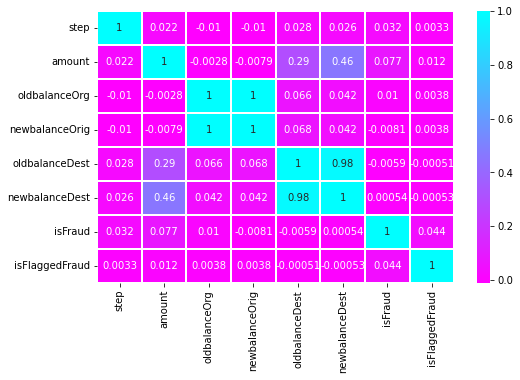

In [31]:
plt.figure(figsize=(8,5))
sns.heatmap(transactions_df.corr(), cmap='cool_r', linewidth=0.2, annot=True);

c:\Users\Angelo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


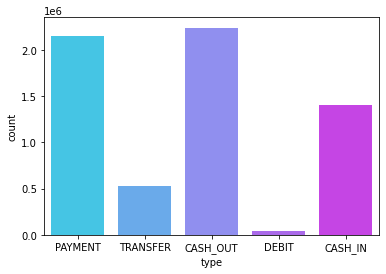

In [33]:
sns.countplot(transactions_df['type'], palette='cool');

In [34]:
transactions_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [49]:
df = transactions_df.groupby(['type','isFraud'],as_index=False).count()
df = df[['type','isFraud','step']].rename(columns={'step':'numbers'})

In [53]:
df[df['isFraud']==1]

,type,isFraud,numbers
2,CASH_OUT,1,4116
6,TRANSFER,1,4097


In [56]:
fraud = transactions_df[transactions_df['isFraud']==1]

In [57]:
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
